# Analysis of Ridership Project

## Importing Necessary Libraries and Modules

In this project, we will analyze the ridership data to uncover trends and insights. We need to import several libraries and modules that will assist us in data collection, cleaning, visualization, and statistical analysis.

### Custom Modules

From the custom module `siads_593_milestone1.deepnote.Data_Collection_And_Cleaning`, we import:
- `primary_dataset_cleaning`: Function for cleaning the primary dataset.
- `secondary_dataset_cleaning`: Function for cleaning the secondary dataset.
- `tertiary_dataset_cleaning`: Function for cleaning the tertiary dataset.
- `final_merge_df`: Function for merging the cleaned datasets into a final DataFrame.


In [ ]:
import import_ipynb
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from siads_593_milestone1.deepnote.Data_Collection_And_Cleaning import (
    primary_dataset_cleaning, 
    secondary_dataset_cleaning, 
    tertiary_dataset_cleaning, 
    final_merge_df)
from ydata_profiling import ProfileReport
from scipy.stats import pearsonr
from IPython.display import display

%matplotlib inline

importing Jupyter notebook from /root/work/siads_593_milestone1/deepnote/Data_Collection_And_Cleaning.ipynb


## Population Summary Statistics

In this cell, we define a function `population_summary_stats` that computes and returns summary statistics for the population data across different census years (2000, 2010, and 2020). This function uses the `secondary_dataset_cleaning` function to obtain the cleaned population dataset.

### Function: `population_summary_stats`

In [ ]:
# Population Summary Stats

def population_summary_stats():
    
    # Get population by Zip Code
    population_df = secondary_dataset_cleaning()

    # 2000 Min/Max Zip Codes
    max_2000 = population_df.loc[population_df['2000 Population'] == population_df['2000 Population'].max()]
    min_2000 = population_df.loc[population_df['2000 Population'] == population_df['2000 Population'].min()]

    # 2010 Min/Max Zip Codes
    max_2010 = population_df.loc[population_df['2010 Population'] == population_df['2010 Population'].max()]
    min_2010 = population_df.loc[population_df['2010 Population'] == population_df['2010 Population'].min()]

    # 2020 Min/Max Zip Codes
    max_2020 = population_df.loc[population_df['2020 Population'] == population_df['2020 Population'].max()]
    min_2020 = population_df.loc[population_df['2020 Population'] == population_df['2020 Population'].min()]

    #Max and Min Populations in each census year
    summary_df = pd.DataFrame()
    summary_df = pd.concat([max_2000, min_2000, max_2010, min_2010, max_2020, min_2020], ignore_index = True)
    summary_df.index = ['2000 Max Population ZIP', '2000 Min Population ZIP', '2010 Max Population ZIP',
    '2010 Min Population ZIP', '2020 Max Population ZIP', '2020 Min Population ZIP']

    return summary_df

## Function to Calculate Ridership Summary Statistics

In this cell, we define a function `ridership_summary_stats` that calculates the maximum and minimum monthly ridership statistics from the primary dataset.

Please note that `IPyWidgets are not supported` in deepnote and igore the warning


In [ ]:
def ridership_summary_stats():
    df = primary_dataset_cleaning()

    months = df['MONTH_BEGINNING'].unique()
    max_result_df = pd.DataFrame()
    min_result_df = pd.DataFrame()

    for month in months:
        monthly_data = df[df['MONTH_BEGINNING'] == month]
        
        # Find the row with the maximum value in MONTHTOTAL
        max_row = monthly_data.loc[monthly_data['MONTHTOTAL'].idxmax()]
        max_result_df = pd.concat([max_result_df, max_row.to_frame().T], ignore_index=True)
        
        # Find the row with the minimum value in MONTHTOTAL
        min_row = monthly_data.loc[monthly_data['MONTHTOTAL'].idxmin()]
        min_result_df = pd.concat([min_result_df, min_row.to_frame().T], ignore_index=True)

    return max_result_df, min_result_df

# Data Profiling Reports

In this, we generate profiling reports for four datasets: `primary_dataset`, `secondary_dataset`, `tertiary_dataset`, and `merged_df_dataset`. These reports provide detailed insights into the datasets
<span style="color: red;">The generation of HTML is commented out to not display IPWidget warning. Please refer to `src/report/NAME_OF_DATASET_dataset_profiling.html` for the generated report </span>

In [ ]:
primary_dataset_df = primary_dataset_cleaning()
primary_dataset_profiling = ProfileReport(primary_dataset_df, title="Pandas Profiling report")

#primary_dataset_profiling.to_file("siads_593_milestone1/src/reports/primary_dataset_profiling.html")

In [ ]:
secondary_dataset_df = secondary_dataset_cleaning()
secondary_dataset_profiling = ProfileReport(secondary_dataset_df, title="Pandas Profiling report")

#secondary_dataset_profiling.to_file("siads_593_milestone1/src/reports/secondary_dataset_profiling.html")

In [ ]:
tertiary_dataset_df = tertiary_dataset_cleaning()
tertiary_dataset_profiling = ProfileReport(tertiary_dataset_df, title="Pandas Profiling report")

tertiary_dataset_profiling.to_file("siads_593_milestone1/src/reports/tertiary_dataset_profiling.html")

In [ ]:
final_merge_df_profiling = ProfileReport(final_merge_df, title="Pandas Profiling report")

final_merge_df_profiling.to_file("siads_593_milestone1/src/reports/final_merge_dataset_profiling.html")

## Data Cleaning: Removing Missing Values

Now, we proceed with cleaning our final merged dataset by removing any rows that contain missing values.

In [ ]:
final_merge_df.dropna(inplace=True)

## Calculating Pearson Correlation Coefficient

We calculate the Pearson correlation coefficient between the total monthly ridership and the population for different years (2000, 2010, and 2020). The Pearson correlation coefficient measures the linear correlation between two variables, giving a value between -1 and 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.

In [ ]:
# Calculate Pearson correlation for each year
correlation_2000 = pearsonr(final_merge_df['MONTHTOTAL'], final_merge_df['2000 Population'])
correlation_2010 = pearsonr(final_merge_df['MONTHTOTAL'], final_merge_df['2010 Population'])
correlation_2020 = pearsonr(final_merge_df['MONTHTOTAL'], final_merge_df['2020 Population'])

print(f'Pearson correlation coefficient for 2000 Population: {correlation_2000}')
print(f'Pearson correlation coefficient for 2010 Population: {correlation_2010}')
print(f'Pearson correlation coefficient for 2020 Population: {correlation_2020}')

Pearson correlation coefficient for 2000 Population: PearsonRResult(statistic=-0.05701416493773015, pvalue=1.200990276676663e-27)
Pearson correlation coefficient for 2010 Population: PearsonRResult(statistic=-0.1689201708810152, pvalue=1.446242227835596e-231)
Pearson correlation coefficient for 2020 Population: PearsonRResult(statistic=-0.1322546292258353, pvalue=5.870669845927167e-142)


In [ ]:
covariance_matrix = final_merge_df[['MONTHTOTAL', '2000 Population', '2010 Population', '2020 Population']].cov()
print(covariance_matrix)


                   MONTHTOTAL  2000 Population  2010 Population  \
MONTHTOTAL       6.417762e+09    -5.026854e+07    -3.493744e+08   
2000 Population -5.026854e+07     1.211277e+08     2.434508e+08   
2010 Population -3.493744e+08     2.434508e+08     6.665542e+08   
2020 Population -2.590641e+08     2.353638e+08     6.240126e+08   

                 2020 Population  
MONTHTOTAL         -2.590641e+08  
2000 Population     2.353638e+08  
2010 Population     6.240126e+08  
2020 Population     5.978732e+08  


## Visualizing Population vs. Ridership Trends

We will create scatter plots to visualize the relationship between the population of 2000, 2010 and 2020 and the ridership data. We will generate a line plot to see ridership trends over time by zip code.

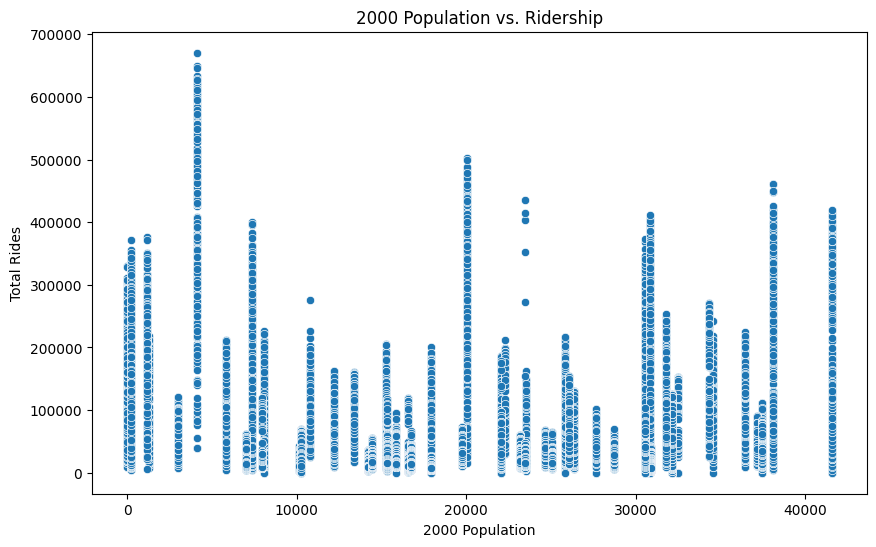

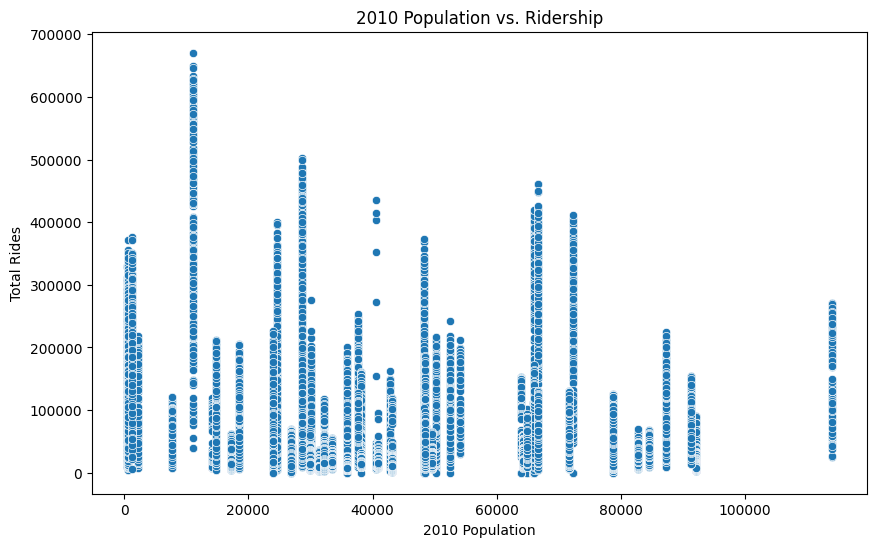

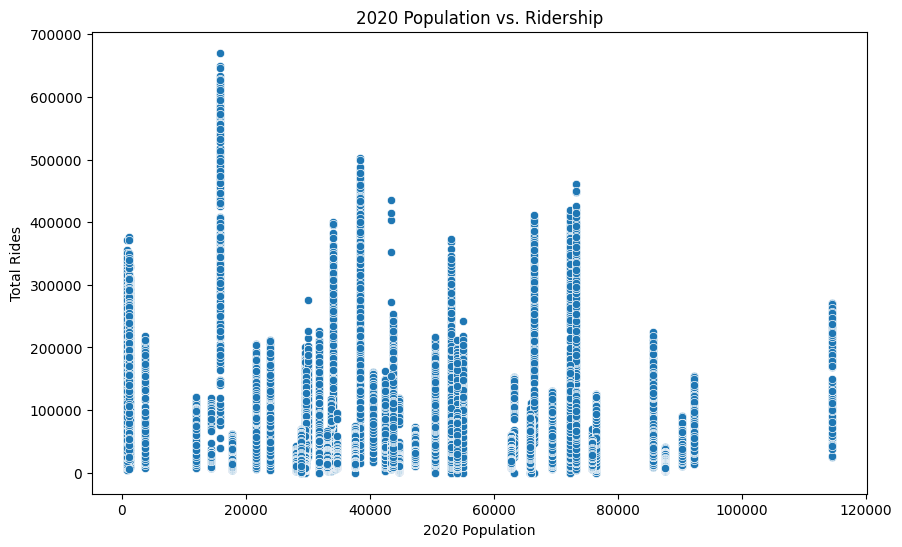

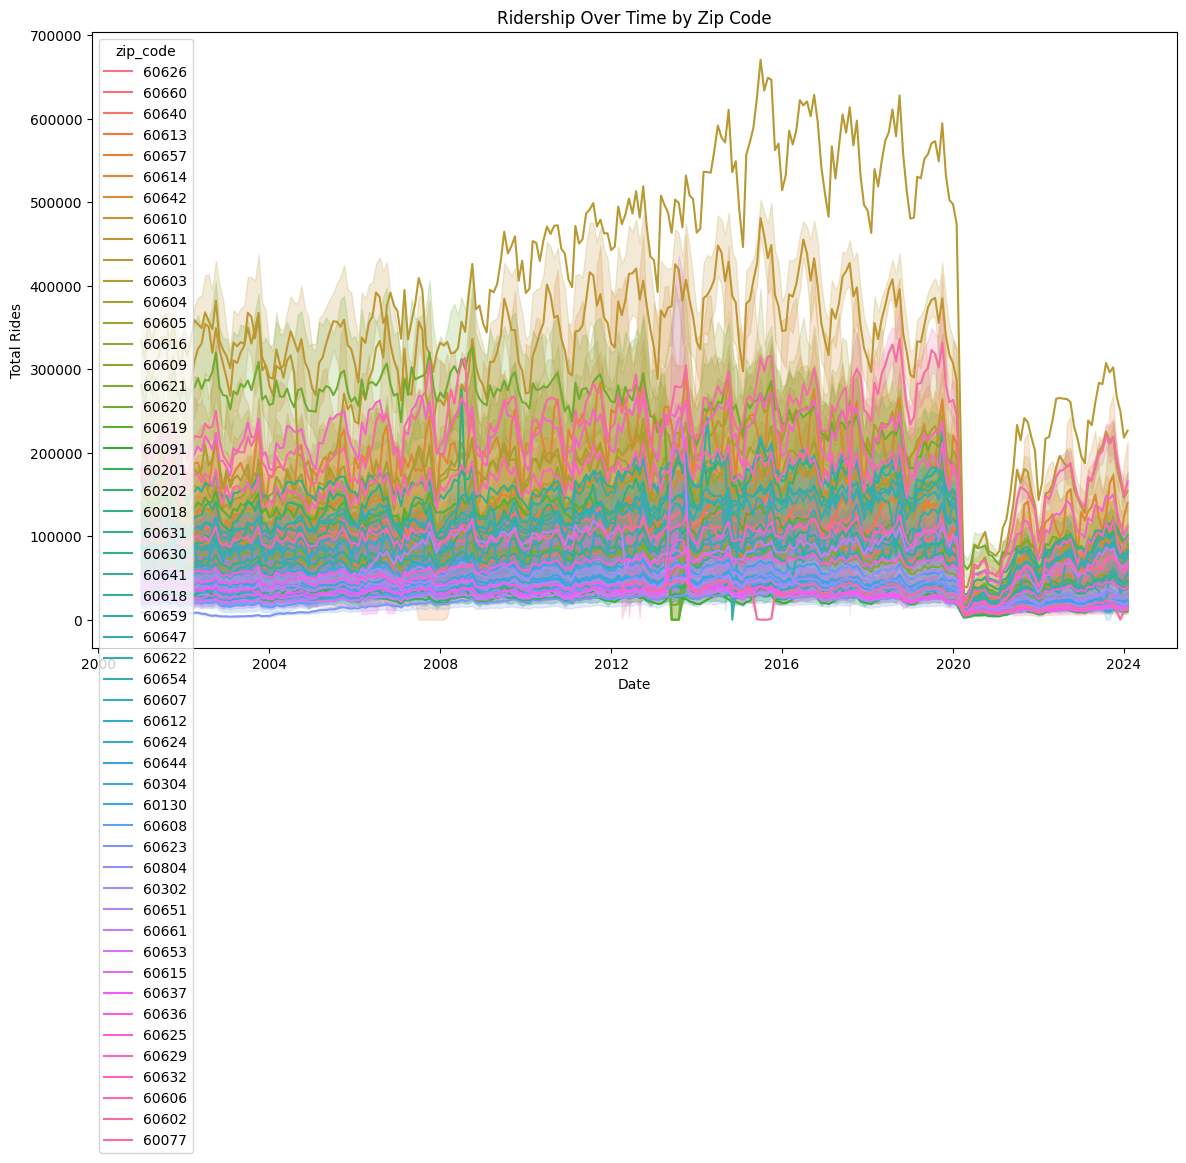

In [ ]:
# Scatter plots for each population year vs. ridership
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2000 Population', y='MONTHTOTAL', data=final_merge_df)
plt.title('2000 Population vs. Ridership')
plt.xlabel('2000 Population')
plt.ylabel('Total Rides')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='2010 Population', y='MONTHTOTAL', data=final_merge_df)
plt.title('2010 Population vs. Ridership')
plt.xlabel('2010 Population')
plt.ylabel('Total Rides')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='2020 Population', y='MONTHTOTAL', data=final_merge_df)
plt.title('2020 Population vs. Ridership')
plt.xlabel('2020 Population')
plt.ylabel('Total Rides')
plt.show()

# Line plot to visualize ridership trends over time
final_merge_df['MONTH_BEGINNING'] = pd.to_datetime(final_merge_df['MONTH_BEGINNING'])

plt.figure(figsize=(14, 8))
sns.lineplot(x='MONTH_BEGINNING', y='MONTHTOTAL', data=final_merge_df, hue='zip_code')
plt.title('Ridership Over Time by Zip Code')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.show()


## Ridership Trends Before and During the COVID-19 Pandemic

We analyze the ridership trends before and during the COVID-19 pandemic. The key steps involve defining a start date for the pandemic, categorizing the data into pre-pandemic and pandemic periods, and visualizing the trends using a line plot.

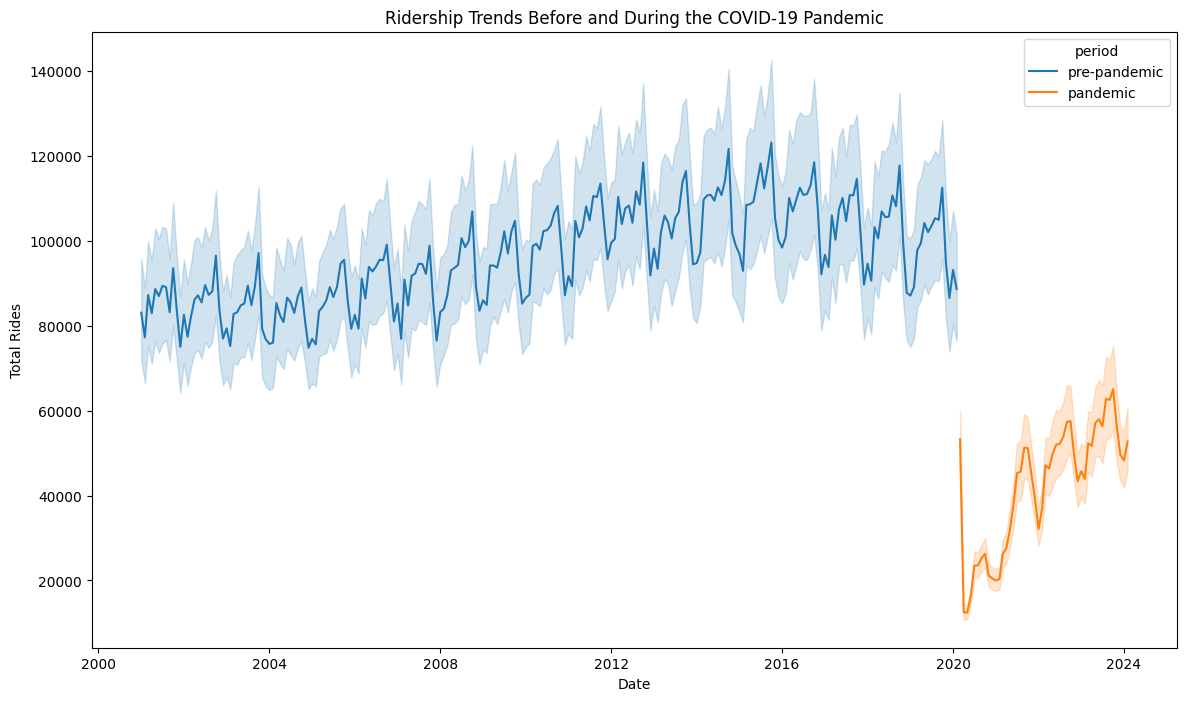

In [ ]:
covid_start_date = '2020-03-01'

final_merge_df['period'] = np.where(final_merge_df['MONTH_BEGINNING'] < covid_start_date, 'pre-pandemic', 'pandemic')

plt.figure(figsize=(14, 8))
sns.lineplot(x='MONTH_BEGINNING', y='MONTHTOTAL', data=final_merge_df, hue='period')
plt.title('Ridership Trends Before and During the COVID-19 Pandemic')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7862ac62-05ae-412f-9bc1-59d586e87203' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>